In [12]:
%matplotlib inline

import pandas as pd
import numpy as np
import os
from functools import reduce
import seaborn as sns
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from scipy import stats
import statsmodels.api as sm
from pylab import rcParams
from matplotlib.backends.backend_agg import FigureCanvasAgg
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import RobustScaler
from sklearn.svm import SVR
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from math import sqrt
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVR
from sklearn.model_selection import GridSearchCV, KFold

plt.style.use('seaborn-darkgrid')

In [13]:
def classify(num, avg):
    if num > avg:
        return 1
    elif num < avg:
        return 0
    
def evaluate(model, test_features, test_labels):
    predictions = model.predict(test_features)
    errors = abs(predictions - test_labels)
    mape = 100 * np.mean(errors / test_labels)
    accuracy = 100 - mape
    print('Model Performance')
    print('Average Error: {:0.4f} degrees.'.format(np.mean(errors)))
    print('Accuracy = {:0.2f}%.'.format(accuracy))
    
    return accuracy

In [14]:
COVID_DF = pd.read_csv('COVID_AllData.csv', index_col = 0)
COVID_DF.head()

,State,cases,deaths,AGI Total,AGI Top 1 Percent,AGI Top 5 Percent,AGI Top 10 Percent,AGI Top 25 Percent,AGI Top 50 Percent,AGI Top 75 Percent,...,School Expenditures per Student Enrollment(Percent),Public School Salary 2018(Dollars),Employer Sponsored Insurance Premium Costs (Single Coverage),Employer Sponsored Insurance Premium Costs (Family Coverage),Employee Contribution to Premium Costs (Single Coverage),Employee Contribution to Premium Costs (Family Coverage),Employee Contribution to Premium Costs (Combined Average),Employee Deductible Costs (Single Coverage),Employee Deductible Costs (Combined Average),Total Potential Out-of-Pocket Costs (Employee Contribution + Deductible)
0,Alabama,387786,14345,119662909,18553159,35924229,49537638,76667112,101687773,114405941,...,9257.567670,50568.0,6089,18001,1453,5278,4260,1569,2563,6824
1,Alaska,18316,367,23969001,2848087,6184956,8915998,14554105,20064361,22927860,...,17509.922477,69682.0,8432,21648,1154,4501,3695,1797,2881,6576
2,Arizona,426614,18857,197753744,33609317,63073164,85351788,128616004,168531690,189378565,...,7710.878778,48723.0,6229,18875,1554,5786,4834,2166,3530,8364
3,Arkansas,161569,3301,74634888,16319991,26475276,34256878,49689104,64088761,71584342,...,9900.217828,50544.0,5974,17995,1375,5728,4661,1501,2741,7403
4,California,2664110,102387,1549284943,356240355,600859502,772738760,1086299917,1360947743,1497300869,...,11419.376126,80680.0,6542,19567,1202,5376,4127,1680,2767,6894


In [15]:
COVID_DF = COVID_DF.drop(columns = ['cases', 'deaths'])
COVID_DF.head()

,State,AGI Total,AGI Top 1 Percent,AGI Top 5 Percent,AGI Top 10 Percent,AGI Top 25 Percent,AGI Top 50 Percent,AGI Top 75 Percent,Total Population,Total population_Male,...,School Expenditures per Student Enrollment(Percent),Public School Salary 2018(Dollars),Employer Sponsored Insurance Premium Costs (Single Coverage),Employer Sponsored Insurance Premium Costs (Family Coverage),Employee Contribution to Premium Costs (Single Coverage),Employee Contribution to Premium Costs (Family Coverage),Employee Contribution to Premium Costs (Combined Average),Employee Deductible Costs (Single Coverage),Employee Deductible Costs (Combined Average),Total Potential Out-of-Pocket Costs (Employee Contribution + Deductible)
0,Alabama,119662909,18553159,35924229,49537638,76667112,101687773,114405941,4887871,2369271,...,9257.567670,50568.0,6089,18001,1453,5278,4260,1569,2563,6824
1,Alaska,23969001,2848087,6184956,8915998,14554105,20064361,22927860,737438,382952,...,17509.922477,69682.0,8432,21648,1154,4501,3695,1797,2881,6576
2,Arizona,197753744,33609317,63073164,85351788,128616004,168531690,189378565,7171646,3565129,...,7710.878778,48723.0,6229,18875,1554,5786,4834,2166,3530,8364
3,Arkansas,74634888,16319991,26475276,34256878,49689104,64088761,71584342,3013825,1476680,...,9900.217828,50544.0,5974,17995,1375,5728,4661,1501,2741,7403
4,California,1549284943,356240355,600859502,772738760,1086299917,1360947743,1497300869,39557045,19673553,...,11419.376126,80680.0,6542,19567,1202,5376,4127,1680,2767,6894


In [16]:
COVID_Case = pd.read_csv('COVID.csv', index_col = 0)
COVID_Case.head()

,State,cases,deaths
0,Alabama,26912,785
1,Alaska,751,10
2,Arizona,39298,1228
3,Arkansas,13191,188
4,California,159098,5202


In [17]:
COVID_DF = pd.merge(COVID_DF, COVID_Case, how = 'left', on = 'State')
COVID_DF.head()

,State,AGI Total,AGI Top 1 Percent,AGI Top 5 Percent,AGI Top 10 Percent,AGI Top 25 Percent,AGI Top 50 Percent,AGI Top 75 Percent,Total Population,Total population_Male,...,Employer Sponsored Insurance Premium Costs (Single Coverage),Employer Sponsored Insurance Premium Costs (Family Coverage),Employee Contribution to Premium Costs (Single Coverage),Employee Contribution to Premium Costs (Family Coverage),Employee Contribution to Premium Costs (Combined Average),Employee Deductible Costs (Single Coverage),Employee Deductible Costs (Combined Average),Total Potential Out-of-Pocket Costs (Employee Contribution + Deductible),cases,deaths
0,Alabama,119662909,18553159,35924229,49537638,76667112,101687773,114405941,4887871,2369271,...,6089,18001,1453,5278,4260,1569,2563,6824,26912,785
1,Alaska,23969001,2848087,6184956,8915998,14554105,20064361,22927860,737438,382952,...,8432,21648,1154,4501,3695,1797,2881,6576,751,10
2,Arizona,197753744,33609317,63073164,85351788,128616004,168531690,189378565,7171646,3565129,...,6229,18875,1554,5786,4834,2166,3530,8364,39298,1228
3,Arkansas,74634888,16319991,26475276,34256878,49689104,64088761,71584342,3013825,1476680,...,5974,17995,1375,5728,4661,1501,2741,7403,13191,188
4,California,1549284943,356240355,600859502,772738760,1086299917,1360947743,1497300869,39557045,19673553,...,6542,19567,1202,5376,4127,1680,2767,6894,159098,5202


In [18]:
COVID_DF = COVID_DF.rename(columns = {'Total population_HISPANIC OR LATINO':'Hispanic or Latino'})
COVID_DF = COVID_DF.drop(columns = ['RACE_Total population'])
COVID_DF.head()

,State,AGI Total,AGI Top 1 Percent,AGI Top 5 Percent,AGI Top 10 Percent,AGI Top 25 Percent,AGI Top 50 Percent,AGI Top 75 Percent,Total Population,Total population_Male,...,Employer Sponsored Insurance Premium Costs (Single Coverage),Employer Sponsored Insurance Premium Costs (Family Coverage),Employee Contribution to Premium Costs (Single Coverage),Employee Contribution to Premium Costs (Family Coverage),Employee Contribution to Premium Costs (Combined Average),Employee Deductible Costs (Single Coverage),Employee Deductible Costs (Combined Average),Total Potential Out-of-Pocket Costs (Employee Contribution + Deductible),cases,deaths
0,Alabama,119662909,18553159,35924229,49537638,76667112,101687773,114405941,4887871,2369271,...,6089,18001,1453,5278,4260,1569,2563,6824,26912,785
1,Alaska,23969001,2848087,6184956,8915998,14554105,20064361,22927860,737438,382952,...,8432,21648,1154,4501,3695,1797,2881,6576,751,10
2,Arizona,197753744,33609317,63073164,85351788,128616004,168531690,189378565,7171646,3565129,...,6229,18875,1554,5786,4834,2166,3530,8364,39298,1228
3,Arkansas,74634888,16319991,26475276,34256878,49689104,64088761,71584342,3013825,1476680,...,5974,17995,1375,5728,4661,1501,2741,7403,13191,188
4,California,1549284943,356240355,600859502,772738760,1086299917,1360947743,1497300869,39557045,19673553,...,6542,19567,1202,5376,4127,1680,2767,6894,159098,5202


In [19]:
COVID_DF['Hispanic or Latino'] = (COVID_DF['Total Population'])-(COVID_DF['White'] + COVID_DF['Black or African American'] + 
                                                     COVID_DF['American Indian and Alaska Native'] + COVID_DF['Asian'] + 
                                                     COVID_DF['Native Hawaiian and Other Pacific Islander'])

COVID_DF.head()

,State,AGI Total,AGI Top 1 Percent,AGI Top 5 Percent,AGI Top 10 Percent,AGI Top 25 Percent,AGI Top 50 Percent,AGI Top 75 Percent,Total Population,Total population_Male,...,Employer Sponsored Insurance Premium Costs (Single Coverage),Employer Sponsored Insurance Premium Costs (Family Coverage),Employee Contribution to Premium Costs (Single Coverage),Employee Contribution to Premium Costs (Family Coverage),Employee Contribution to Premium Costs (Combined Average),Employee Deductible Costs (Single Coverage),Employee Deductible Costs (Combined Average),Total Potential Out-of-Pocket Costs (Employee Contribution + Deductible),cases,deaths
0,Alabama,119662909,18553159,35924229,49537638,76667112,101687773,114405941,4887871,2369271,...,6089,18001,1453,5278,4260,1569,2563,6824,26912,785
1,Alaska,23969001,2848087,6184956,8915998,14554105,20064361,22927860,737438,382952,...,8432,21648,1154,4501,3695,1797,2881,6576,751,10
2,Arizona,197753744,33609317,63073164,85351788,128616004,168531690,189378565,7171646,3565129,...,6229,18875,1554,5786,4834,2166,3530,8364,39298,1228
3,Arkansas,74634888,16319991,26475276,34256878,49689104,64088761,71584342,3013825,1476680,...,5974,17995,1375,5728,4661,1501,2741,7403,13191,188
4,California,1549284943,356240355,600859502,772738760,1086299917,1360947743,1497300869,39557045,19673553,...,6542,19567,1202,5376,4127,1680,2767,6894,159098,5202


In [20]:
COVID_DF.shape

(51, 102)

In [21]:
columns = [col for col in COVID_DF.columns if '(Percent)' not in col][1:]
columns = columns[:-2]
columns

['AGI Total',
 'AGI Top 1 Percent',
 'AGI Top 5 Percent',
 'AGI Top 10 Percent',
 'AGI Top 25 Percent',
 'AGI Top 50 Percent',
 'AGI Top 75 Percent',
 'Total Population',
 'Total population_Male',
 'Total population_Female',
 'Under 5 years',
 '5 to 9 years',
 '10 to 14 years',
 '15 to 19 years',
 '20 to 24 years',
 '25 to 34 years',
 '35 to 44 years',
 '45 to 54 years',
 '55 to 59 years',
 '60 to 64 years',
 '65 to 74 years',
 '75 to 84 years',
 '85 years and over',
 'White',
 'Black or African American',
 'American Indian and Alaska Native',
 'Asian',
 'Native Hawaiian and Other Pacific Islander',
 'Hispanic or Latino',
 '4th 2015 Math',
 '4th 2015 Science',
 '8th 2015 Math',
 '8th 2015 Science',
 'Labor Force w/ Bachelor 2018',
 'Labor Force Participants 2018',
 'Percent of Labor Force w/ Bachelor 2018',
 'Doctorate From Doc Inst 2018',
 'Doctorate From Bach Inst 2018',
 'Total Doctorate Degrees 2018',
 'Less Than HS Diploma 14-18',
 'HS Diploma 14-18',
 'Some College or Associate D

In [22]:
model1 = sm.OLS(COVID_DF['cases'], COVID_DF[columns]).fit()
model1.summary()

c:\python38\lib\site-packages\statsmodels\regression\linear_model.py:1698: RuntimeWarning: divide by zero encountered in true_divide
  return 1 - (np.divide(self.nobs - self.k_constant, self.df_resid)
c:\python38\lib\site-packages\statsmodels\regression\linear_model.py:1698: RuntimeWarning: invalid value encountered in double_scalars
  return 1 - (np.divide(self.nobs - self.k_constant, self.df_resid)
c:\python38\lib\site-packages\scipy\stats\_distn_infrastructure.py:903: RuntimeWarning: invalid value encountered in greater
  return (a < x) & (x < b)
c:\python38\lib\site-packages\scipy\stats\_distn_infrastructure.py:903: RuntimeWarning: invalid value encountered in less
  return (a < x) & (x < b)
c:\python38\lib\site-packages\scipy\stats\_distn_infrastructure.py:1912: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= _a)
c:\python38\lib\site-packages\statsmodels\regression\linear_model.py:1620: RuntimeWarning: divide by zero encountered in double_scalars
  

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  cases   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                    nan
Method:                 Least Squares   F-statistic:                       nan
Date:                Wed, 08 Jul 2020   Prob (F-statistic):                nan
Time:                        03:01:02   Log-Likelihood:                 752.53
No. Observations:                  51   AIC:                            -1403.
Df Residuals:                       0   BIC:                            -1305.
Df Model:                          50                                         
Covariance Type:            nonrobust                                         
============================================================================================================================================
                                                                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------------------------------------------
AGI Total                                                                    0.0799        inf          0        nan         nan         nan
AGI Top 1 Percent                                                            0.0207        inf          0        nan         nan         nan
AGI Top 5 Percent                                                            0.0342        inf          0        nan         nan         nan
AGI Top 10 Percent                                                          -0.0955        inf         -0        nan         nan         nan
AGI Top 25 Percent                                                           0.0231        inf          0        nan         nan         nan
AGI Top 50 Percent                                                           0.1008        inf          0        nan         nan         nan
AGI Top 75 Percent                                                          -0.1603        inf         -0        nan         nan         nan
Total Population                                                             0.2154        inf          0        nan         nan         nan
Total population_Male                                                       -0.0811        inf         -0        nan         nan         nan
Total population_Female                                                      0.2966        inf          0        nan         nan         nan
Under 5 years                                                               -0.9785        inf         -0        nan         nan         nan
5 to 9 years                                                                 0.3591        inf          0        nan         nan         nan
10 to 14 years                                                               0.3017        inf          0        nan         nan         nan
15 to 19 years                                                               0.0453        inf          0        nan         nan         nan
20 to 24 years                                                              -0.8060        inf         -0        nan         nan         nan
25 to 34 years                                                               0.2216        inf          0        nan         nan         nan
35 to 44 years                                                              -0.1325        inf         -0        nan         nan         nan
45 to 54 years                                                               0.0058        inf          0        nan         nan         nan
55 to 59 years                                                              -0.3704        inf         -0        nan      

In [23]:
test_len = int(0.25 * len(COVID_DF))
train_len = len(COVID_DF) - test_len
print('Train Set Len: ' + str(train_len))
print('Test Set Len: ' + str(test_len))

train = COVID_DF[:train_len]
test = COVID_DF[train_len:]
print('Train Set Shape: ' + str(train.shape))
print('Test Set Shape: ' + str(test.shape))

Train Set Len: 39
Test Set Len: 12
Train Set Shape: (39, 102)
Test Set Shape: (12, 102)


## Linear Regression

In [24]:
features_list = columns
    
target = 'cases'

X_train = train[features_list]
y_train = train[target]
X_test = test[features_list]
y_test = test[target]

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
y_train_scaled = scaler.fit_transform(np.array(y_train).reshape(-1, 1))

LinearModel = LinearRegression()
LinearModel.fit(X_train_scaled, y_train_scaled)

train_predictions_scaled = LinearModel.predict(X_train_scaled)
train_predictions = scaler.inverse_transform(train_predictions_scaled)
test_predictions_scaled = LinearModel.predict(X_test_scaled)
test_predictions = scaler.inverse_transform(test_predictions_scaled)

Train_MAE = mean_absolute_error(y_train, train_predictions)
Train_MSE = mean_squared_error(y_train, train_predictions)
Train_RMS = sqrt(mean_squared_error(y_train, train_predictions))
Train_R2Score = r2_score(y_train, train_predictions)

Test_MAE = mean_absolute_error(y_test, test_predictions)
Test_MSE = mean_squared_error(y_test, test_predictions)
Test_RMS = sqrt(mean_squared_error(y_test, test_predictions))
Test_R2Score = r2_score(y_test, test_predictions)

print('Train MAE Value:', Train_MAE)
print('Train MSE Value:', Train_MSE)
print('Train RMS Value:', Train_RMS)
print('Train R2 Score:', Train_R2Score)
print('\n')

print('Test MAE Value:', Test_MAE)
print('Test MSE Value:', Test_MSE)
print('Test RMS Value:', Test_RMS)
print('Test R2 Score:', Test_R2Score)

Train MAE Value: 7.602442891742939e-11
Train MSE Value: 1.1854049631626588e-20
Train RMS Value: 1.0887630427061064e-10
Train R2 Score: 1.0


Test MAE Value: 24909.080131362396
Test MSE Value: 845169741.301871
Test RMS Value: 29071.803200040256
Test R2 Score: -0.2323307618739141


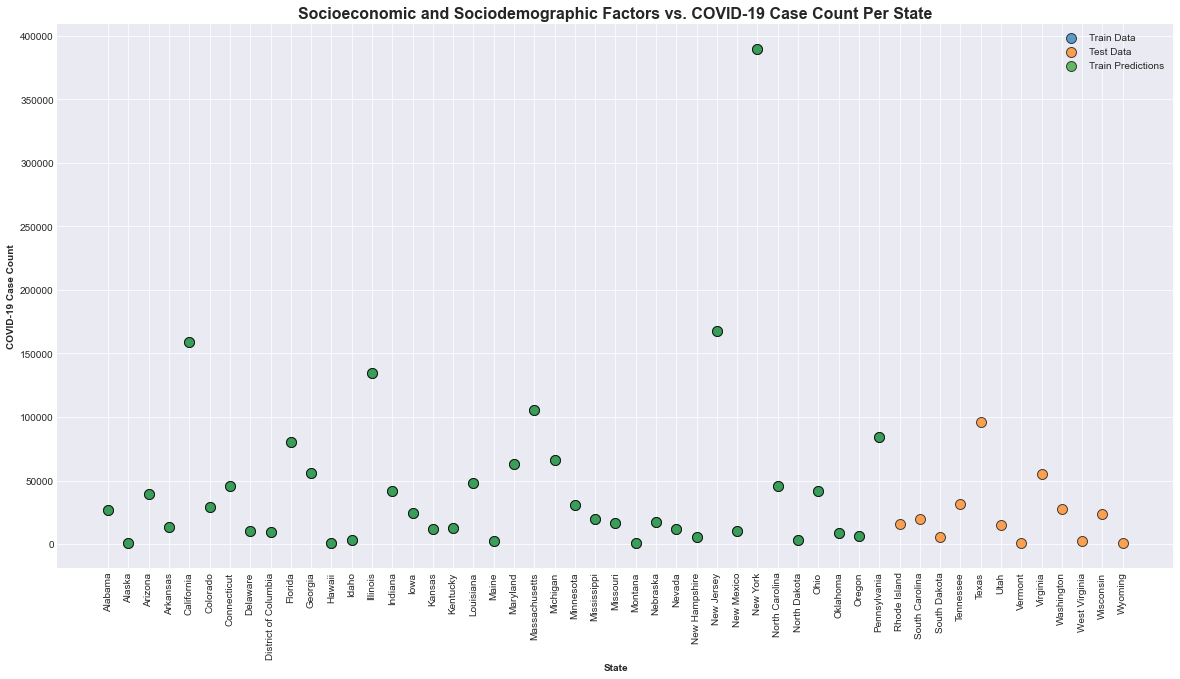

In [25]:
rcParams['figure.figsize'] = 20, 10

plt.figure()

plt.scatter(x = train['State'], y = train['cases'], linewidths = 1, alpha = 0.7, edgecolor = 'k', s = 100, cmap = 'inferno')
plt.scatter(x = test['State'], y = test['cases'], linewidths = 1, alpha = 0.7, edgecolor = 'k', s = 100, cmap = 'inferno')
plt.scatter(x = train['State'], y = train_predictions, linewidths = 1, alpha = 0.7, edgecolor = 'k', s = 100, cmap = 'inferno')
plt.title('Socioeconomic and Sociodemographic Factors vs. COVID-19 Case Count Per State', fontsize = 16, fontweight = 'bold')
plt.xlabel('State', fontsize = 10, fontweight = 'bold')
plt.ylabel('COVID-19 Case Count', fontsize = 10, fontweight = 'bold')

plt.legend(['Train Data', 'Test Data', 'Train Predictions'])

plt.xticks(rotation = 90)
plt.show();

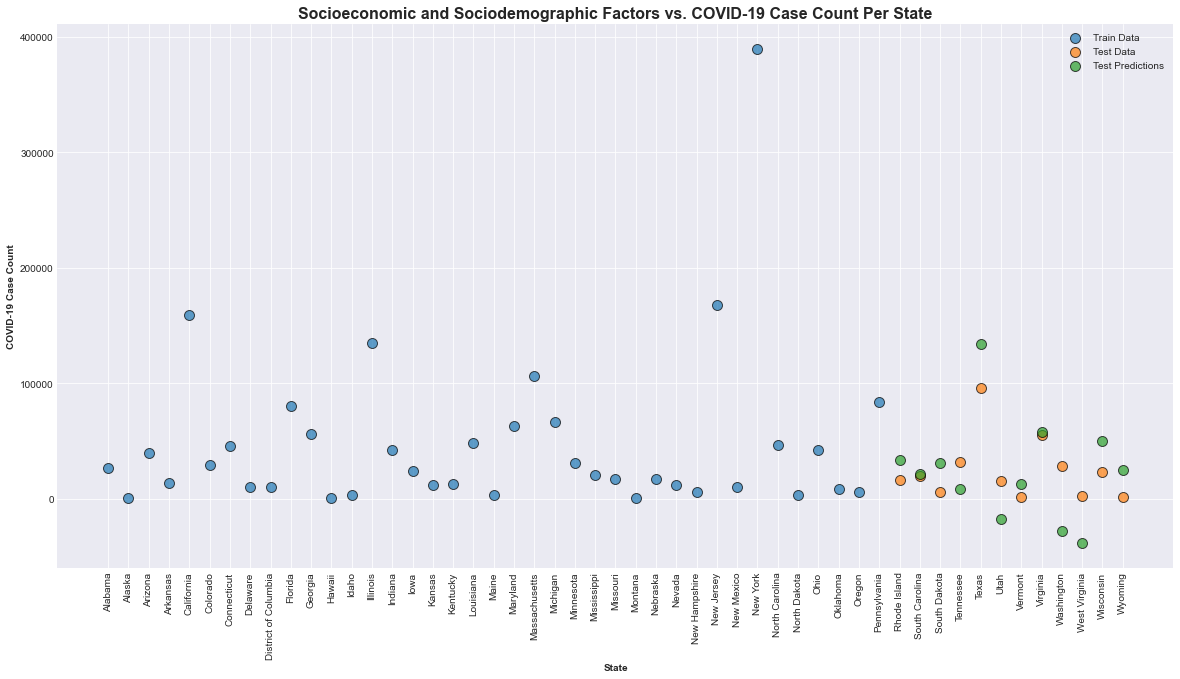

In [26]:
rcParams['figure.figsize'] = 20, 10

plt.figure()

plt.scatter(x = train['State'], y = train['cases'], linewidths = 1, alpha = 0.7, edgecolor = 'k', s = 100, cmap = 'inferno')
plt.scatter(x = test['State'], y = test['cases'], linewidths = 1, alpha = 0.7, edgecolor = 'k', s = 100, cmap = 'inferno')
plt.scatter(x = test['State'], y = test_predictions, linewidths = 1, alpha = 0.7, edgecolor = 'k', s = 100, cmap = 'inferno')
plt.title('Socioeconomic and Sociodemographic Factors vs. COVID-19 Case Count Per State', fontsize = 16, fontweight = 'bold')
plt.xlabel('State', fontsize = 10, fontweight = 'bold')
plt.ylabel('COVID-19 Case Count', fontsize = 10, fontweight = 'bold')

plt.legend(['Train Data', 'Test Data', 'Test Predictions'])

plt.xticks(rotation = 90)
plt.show();

In [27]:
evaluate(LinearModel, X_train_scaled, y_train_scaled)

Model Performance
Average Error: 0.0000 degrees.
Accuracy = 100.00%.


99.99999999999983

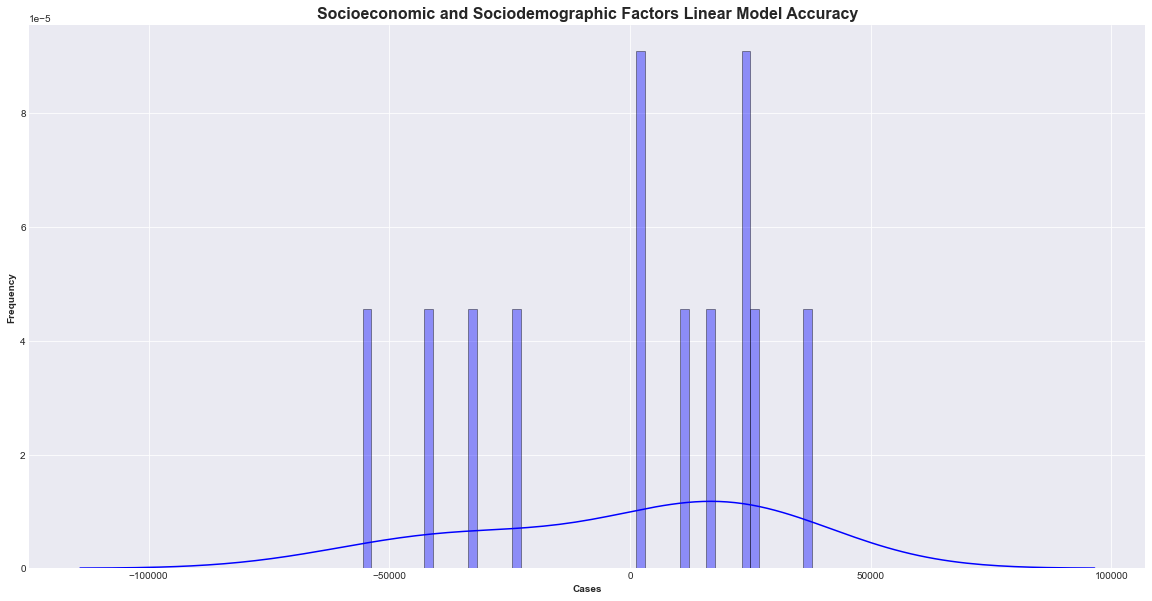

In [28]:
rcParams['figure.figsize'] = 20, 10

plt.figure()
sns.distplot((np.array(test_predictions).reshape(-1) - y_test), bins = 51, color = 'b', hist_kws = {'edgecolor':'k'})
plt.title('Socioeconomic and Sociodemographic Factors Linear Model Accuracy', fontsize = 16, fontweight = 'bold')
plt.xlabel('Cases', fontsize = 10, fontweight = 'bold')
plt.ylabel('Frequency', fontsize = 10, fontweight = 'bold')

plt.show();

## SVR

In [29]:
features_list = columns
    
target = 'cases'

X_train = train[features_list]
y_train = train[target]
X_test = test[features_list]
y_test = test[target]

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
y_train_scaled = scaler.fit_transform(np.array(y_train).reshape(-1, 1))

SVRModel = SVR(kernel = 'linear')
SVRModel.fit(X_train_scaled, y_train_scaled)

train_predictions_scaled = SVRModel.predict(X_train_scaled)
train_predictions = scaler.inverse_transform(train_predictions_scaled)
test_predictions_scaled = SVRModel.predict(X_test_scaled)
test_predictions = scaler.inverse_transform(test_predictions_scaled)

Train_MAE = mean_absolute_error(y_train, train_predictions)
Train_MSE = mean_squared_error(y_train, train_predictions)
Train_RMS = sqrt(mean_squared_error(y_train, train_predictions))
Train_R2Score = r2_score(y_train, train_predictions)

Test_MAE = mean_absolute_error(y_test, test_predictions)
Test_MSE = mean_squared_error(y_test, test_predictions)
Test_RMS = sqrt(mean_squared_error(y_test, test_predictions))
Test_R2Score = r2_score(y_test, test_predictions)

print('Train MAE Value:', Train_MAE)
print('Train MSE Value:', Train_MSE)
print('Train RMS Value:', Train_RMS)
print('Train R2 Score:', Train_R2Score)
print('\n')

print('Test MAE Value:', Test_MAE)
print('Test MSE Value:', Test_MSE)
print('Test RMS Value:', Test_RMS)
print('Test R2 Score:', Test_R2Score)

Train MAE Value: 6318.496898168504
Train MSE Value: 42471198.80660283
Train RMS Value: 6516.993080140781
Train R2 Score: 0.9912246339117211


Test MAE Value: 20758.208445868186
Test MSE Value: 729078831.0906469
Test RMS Value: 27001.45979554896
Test R2 Score: -0.0630601493140448


c:\python38\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


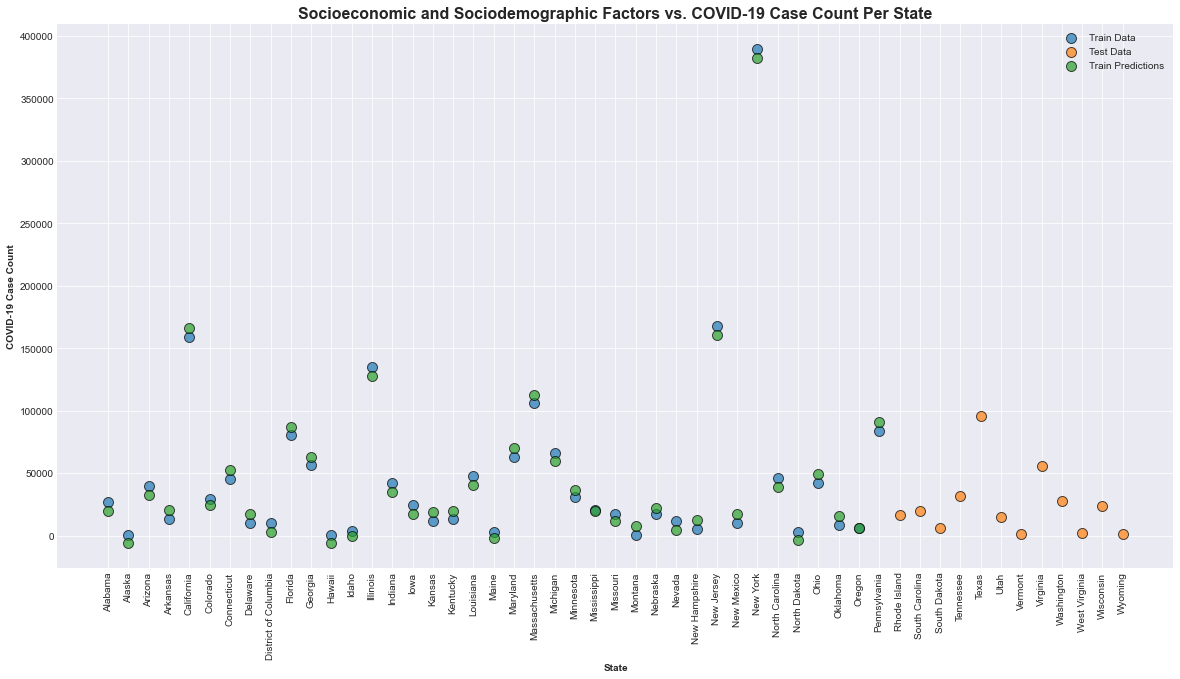

In [30]:
rcParams['figure.figsize'] = 20, 10

plt.figure()

plt.scatter(x = train['State'], y = train['cases'], linewidths = 1, alpha = 0.7, edgecolor = 'k', s = 100, cmap = 'inferno')
plt.scatter(x = test['State'], y = test['cases'], linewidths = 1, alpha = 0.7, edgecolor = 'k', s = 100, cmap = 'inferno')
plt.scatter(x = train['State'], y = train_predictions, linewidths = 1, alpha = 0.7, edgecolor = 'k', s = 100, cmap = 'inferno')
plt.title('Socioeconomic and Sociodemographic Factors vs. COVID-19 Case Count Per State', fontsize = 16, fontweight = 'bold')
plt.xlabel('State', fontsize = 10, fontweight = 'bold')
plt.ylabel('COVID-19 Case Count', fontsize = 10, fontweight = 'bold')

plt.legend(['Train Data', 'Test Data', 'Train Predictions'])

plt.xticks(rotation = 90)
plt.show();

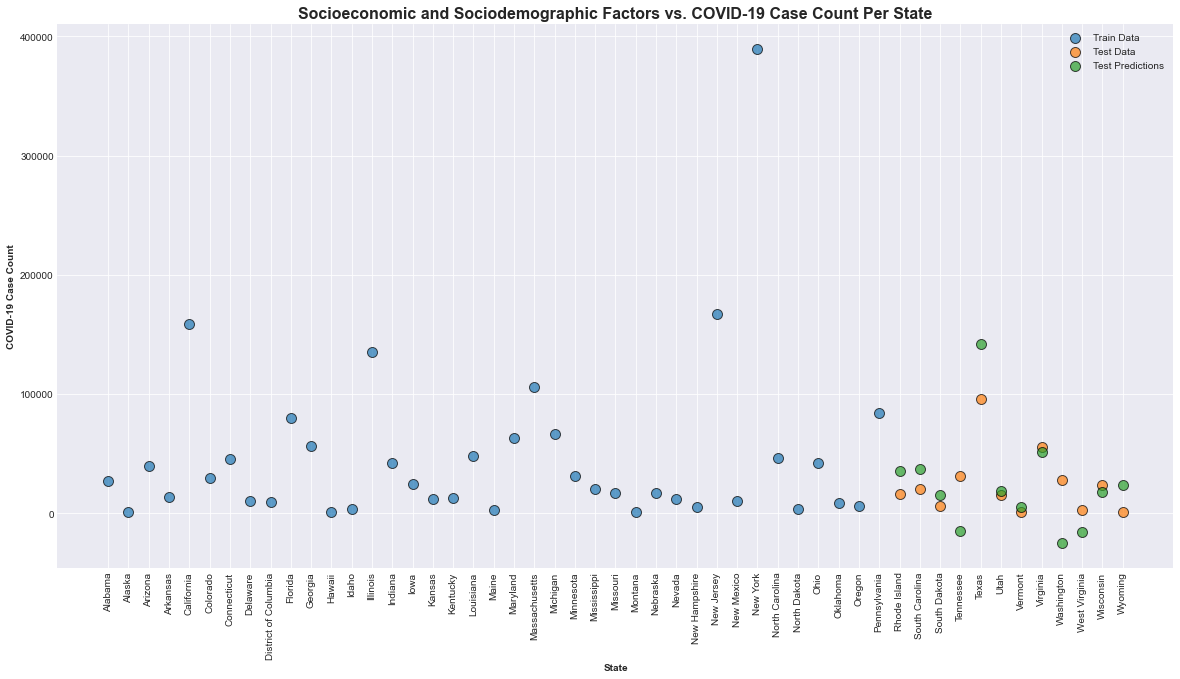

In [31]:
rcParams['figure.figsize'] = 20, 10

plt.figure()

plt.scatter(x = train['State'], y = train['cases'], linewidths = 1, alpha = 0.7, edgecolor = 'k', s = 100, cmap = 'inferno')
plt.scatter(x = test['State'], y = test['cases'], linewidths = 1, alpha = 0.7, edgecolor = 'k', s = 100, cmap = 'inferno')
plt.scatter(x = test['State'], y = test_predictions, linewidths = 1, alpha = 0.7, edgecolor = 'k', s = 100, cmap = 'inferno')
plt.title('Socioeconomic and Sociodemographic Factors vs. COVID-19 Case Count Per State', fontsize = 16, fontweight = 'bold')
plt.xlabel('State', fontsize = 10, fontweight = 'bold')
plt.ylabel('COVID-19 Case Count', fontsize = 10, fontweight = 'bold')

plt.legend(['Train Data', 'Test Data', 'Test Predictions'])

plt.xticks(rotation = 90)
plt.show();

In [32]:
evaluate(SVRModel, X_train_scaled, y_train_scaled)

Model Performance
Average Error: 0.8414 degrees.
Accuracy = 91.70%.


91.70252946296247

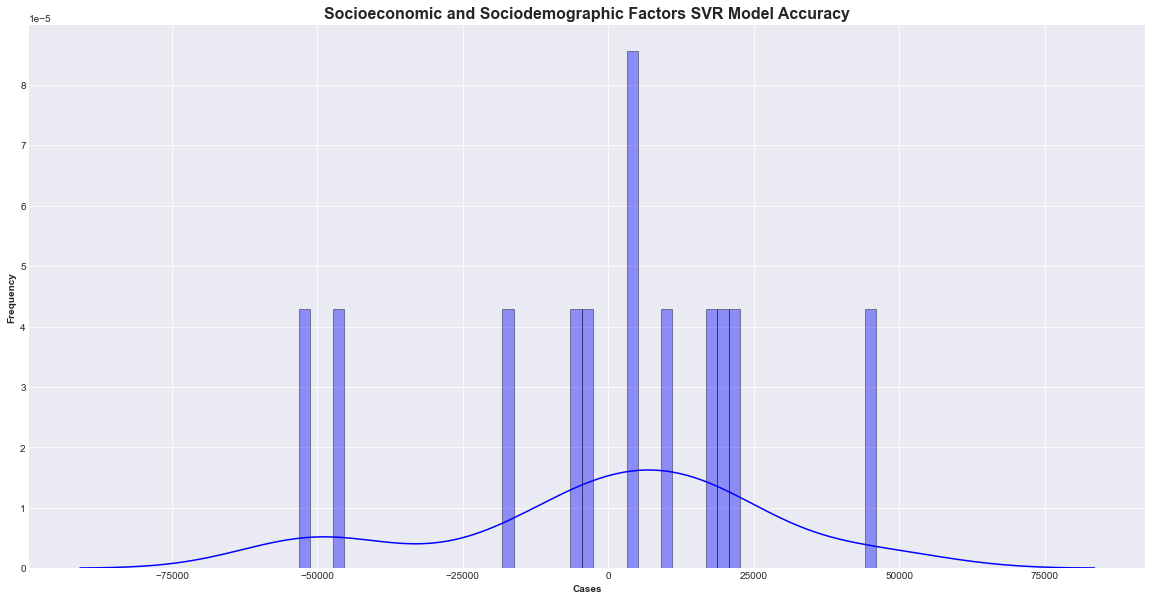

In [33]:
rcParams['figure.figsize'] = 20, 10

plt.figure()
sns.distplot((np.array(test_predictions).reshape(-1) - y_test), bins = 51, color = 'b', hist_kws = {'edgecolor':'k'})
plt.title('Socioeconomic and Sociodemographic Factors SVR Model Accuracy', fontsize = 16, fontweight = 'bold')
plt.xlabel('Cases', fontsize = 10, fontweight = 'bold')
plt.ylabel('Frequency', fontsize = 10, fontweight = 'bold')

plt.show();

## Random Forest Regression

In [34]:
features_list = columns
    
target = 'cases'

X_train = train[features_list]
y_train = train[target]
X_test = test[features_list]
y_test = test[target]

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
y_train_scaled = scaler.fit_transform(np.array(y_train).reshape(-1, 1))

RanForModel = RandomForestRegressor()
RanForModel.fit(X_train_scaled, y_train_scaled)

train_predictions_scaled = RanForModel.predict(X_train_scaled)
train_predictions = scaler.inverse_transform(train_predictions_scaled)
test_predictions_scaled = RanForModel.predict(X_test_scaled)
test_predictions = scaler.inverse_transform(test_predictions_scaled)

Train_MAE = mean_absolute_error(y_train, train_predictions)
Train_MSE = mean_squared_error(y_train, train_predictions)
Train_RMS = sqrt(mean_squared_error(y_train, train_predictions))
Train_R2Score = r2_score(y_train, train_predictions)

Test_MAE = mean_absolute_error(y_test, test_predictions)
Test_MSE = mean_squared_error(y_test, test_predictions)
Test_RMS = sqrt(mean_squared_error(y_test, test_predictions))
Test_R2Score = r2_score(y_test, test_predictions)

print('Train MAE Value:', Train_MAE)
print('Train MSE Value:', Train_MSE)
print('Train RMS Value:', Train_RMS)
print('Train R2 Score:', Train_R2Score)
print('\n')

print('Test MAE Value:', Test_MAE)
print('Test MSE Value:', Test_MSE)
print('Test RMS Value:', Test_RMS)
print('Test R2 Score:', Test_R2Score)

Train MAE Value: 9515.518089743593
Train MSE Value: 432934810.1276638
Train RMS Value: 20807.085575055047
Train R2 Score: 0.9105473460137155


Test MAE Value: 16711.09347222222
Test MSE Value: 1054218692.7319841
Test RMS Value: 32468.734079603168
Test R2 Score: -0.5371422583053751


<ipython-input-34-e8fbe4dc92cb>:16: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  RanForModel.fit(X_train_scaled, y_train_scaled)


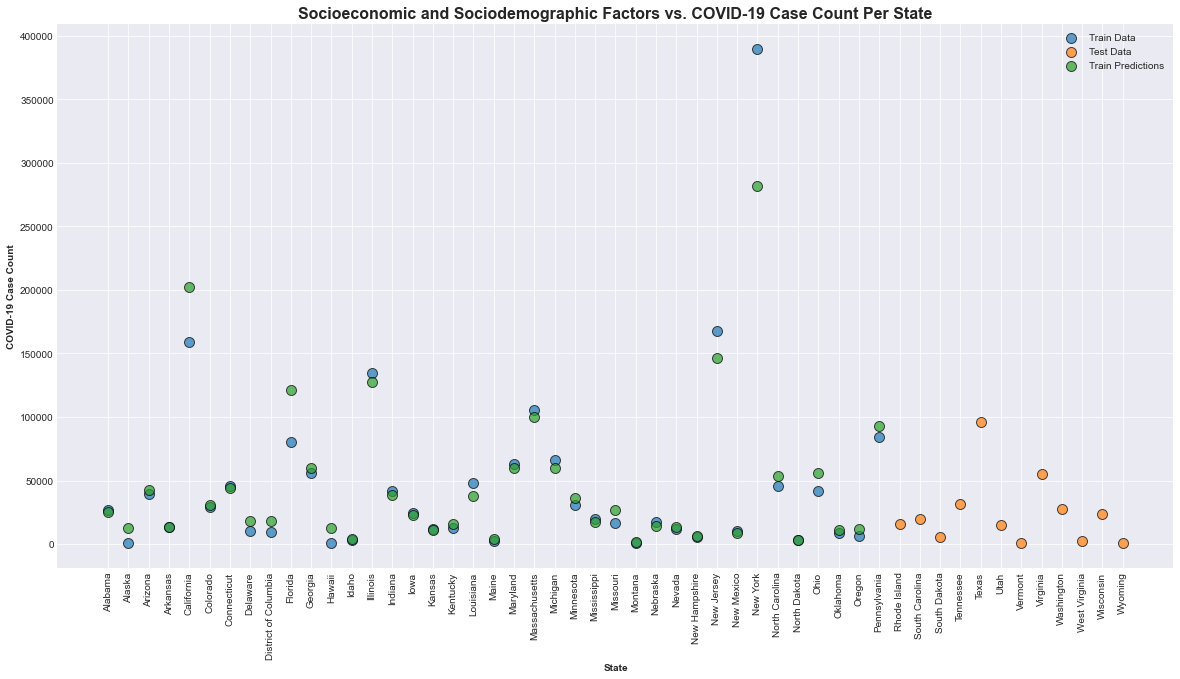

In [35]:
rcParams['figure.figsize'] = 20, 10

plt.figure()

plt.scatter(x = train['State'], y = train['cases'], linewidths = 1, alpha = 0.7, edgecolor = 'k', s = 100, cmap = 'inferno')
plt.scatter(x = test['State'], y = test['cases'], linewidths = 1, alpha = 0.7, edgecolor = 'k', s = 100, cmap = 'inferno')
plt.scatter(x = train['State'], y = train_predictions, linewidths = 1, alpha = 0.7, edgecolor = 'k', s = 100, cmap = 'inferno')
plt.title('Socioeconomic and Sociodemographic Factors vs. COVID-19 Case Count Per State', fontsize = 16, fontweight = 'bold')
plt.xlabel('State', fontsize = 10, fontweight = 'bold')
plt.ylabel('COVID-19 Case Count', fontsize = 10, fontweight = 'bold')

plt.legend(['Train Data', 'Test Data', 'Train Predictions'])

plt.xticks(rotation = 90)
plt.show();

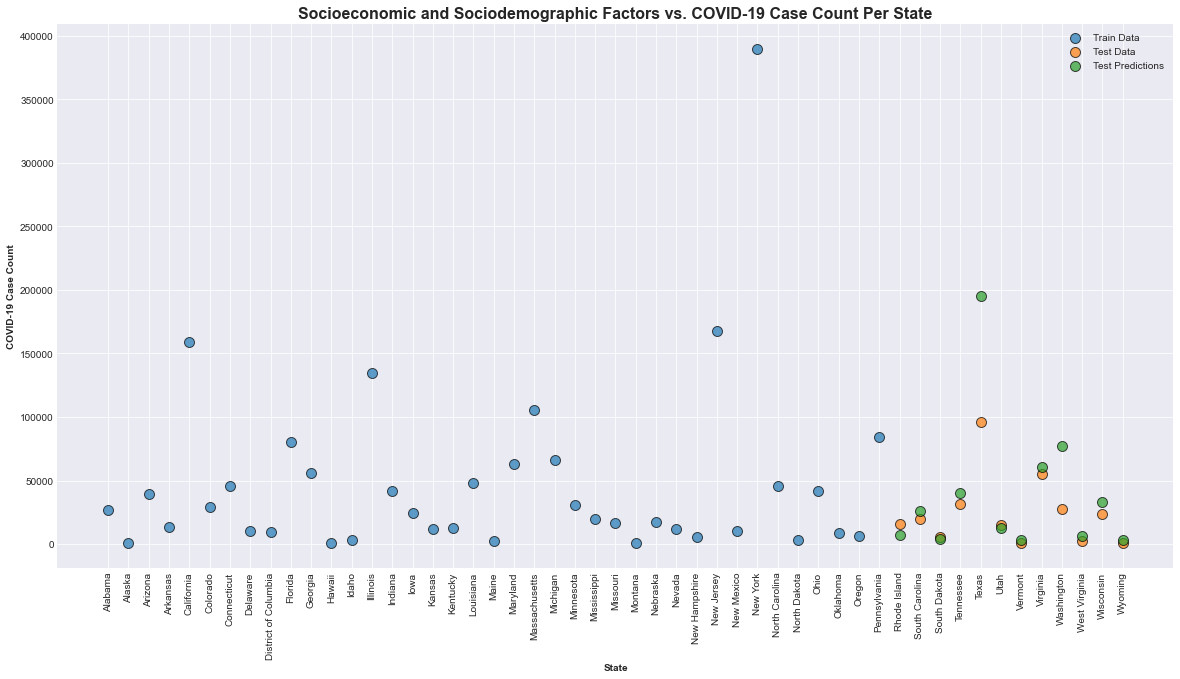

In [36]:
rcParams['figure.figsize'] = 20, 10

plt.figure()

plt.scatter(x = train['State'], y = train['cases'], linewidths = 1, alpha = 0.7, edgecolor = 'k', s = 100, cmap = 'inferno')
plt.scatter(x = test['State'], y = test['cases'], linewidths = 1, alpha = 0.7, edgecolor = 'k', s = 100, cmap = 'inferno')
plt.scatter(x = test['State'], y = test_predictions, linewidths = 1, alpha = 0.7, edgecolor = 'k', s = 100, cmap = 'inferno')
plt.title('Socioeconomic and Sociodemographic Factors vs. COVID-19 Case Count Per State', fontsize = 16, fontweight = 'bold')
plt.xlabel('State', fontsize = 10, fontweight = 'bold')
plt.ylabel('COVID-19 Case Count', fontsize = 10, fontweight = 'bold')

plt.legend(['Train Data', 'Test Data', 'Test Predictions'])

plt.xticks(rotation = 90)
plt.show();

In [37]:
evaluate(RanForModel, X_train_scaled, y_train_scaled)

Model Performance
Average Error: 0.8047 degrees.
Accuracy = 93.47%.


93.47395869878828

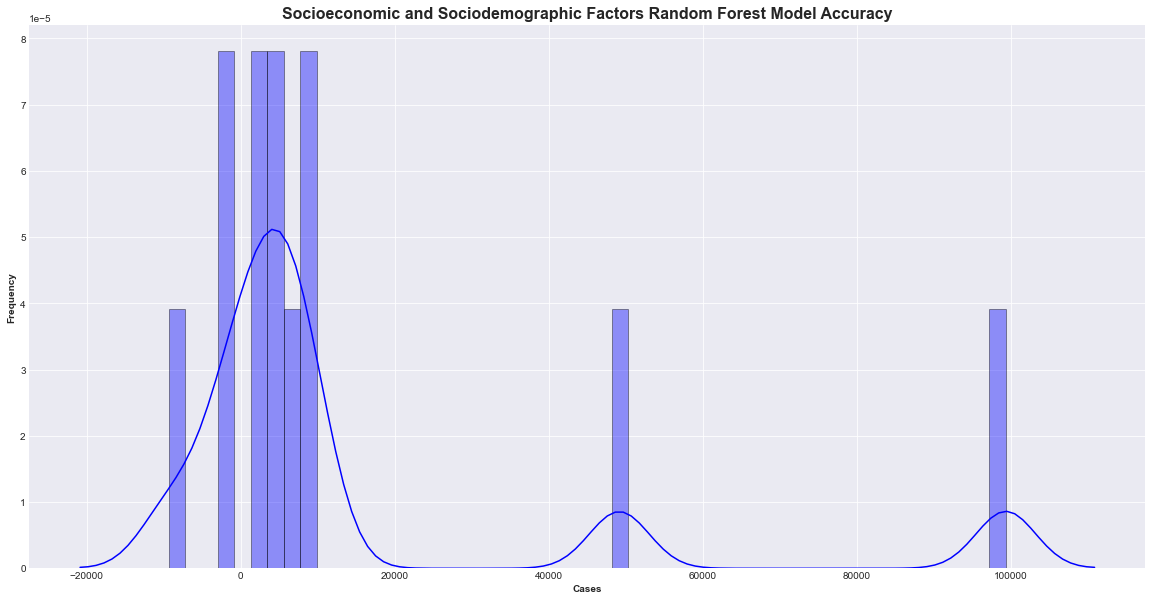

In [38]:
rcParams['figure.figsize'] = 20, 10

plt.figure()
sns.distplot((np.array(test_predictions).reshape(-1) - y_test), bins = 51, color = 'b', hist_kws = {'edgecolor':'k'})
plt.title('Socioeconomic and Sociodemographic Factors Random Forest Model Accuracy', fontsize = 16, fontweight = 'bold')
plt.xlabel('Cases', fontsize = 10, fontweight = 'bold')
plt.ylabel('Frequency', fontsize = 10, fontweight = 'bold')

plt.show();

### Tuning

In [39]:
param_grid = {
    'bootstrap': [True],
    'max_depth': [10, 20, 30, 40, 50],
    'min_samples_leaf': [1, 2, 5, 10, 15, 20],
    'min_samples_split': [8, 10, 12, 16, 20, 24],
    'n_estimators': [100, 200, 300, 400, 500, 1000]
}

kfold = KFold(n_splits = 4)

RF_NewModel = GridSearchCV(estimator = RanForModel, param_grid = param_grid, 
                          cv = kfold, n_jobs = -1, verbose = 2, return_train_score=True)

RF_NewModel.fit(X_train_scaled, y_train_scaled);

Fitting 4 folds for each of 1080 candidates, totalling 4320 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:    3.9s
[Parallel(n_jobs=-1)]: Done 138 tasks      | elapsed:   18.7s
[Parallel(n_jobs=-1)]: Done 341 tasks      | elapsed:   48.7s
[Parallel(n_jobs=-1)]: Done 624 tasks      | elapsed:  1.5min
[Parallel(n_jobs=-1)]: Done 989 tasks      | elapsed:  2.7min
[Parallel(n_jobs=-1)]: Done 1434 tasks      | elapsed:  4.1min
[Parallel(n_jobs=-1)]: Done 1961 tasks      | elapsed:  5.4min
[Parallel(n_jobs=-1)]: Done 2568 tasks      | elapsed:  6.8min
[Parallel(n_jobs=-1)]: Done 3257 tasks      | elapsed:  8.5min
[Parallel(n_jobs=-1)]: Done 4026 tasks      | elapsed: 10.4min
[Parallel(n_jobs=-1)]: Done 4320 out of 4320 | elapsed: 11.0min finished
c:\python38\lib\site-packages\sklearn\model_selection\_search.py:739: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


In [40]:
RF_NewModel.best_params_

{'bootstrap': True,
 'max_depth': 30,
 'min_samples_leaf': 2,
 'min_samples_split': 12,
 'n_estimators': 100}

In [41]:
train_predictions_scaled = RF_NewModel.predict(X_train_scaled)
train_predictions = scaler.inverse_transform(train_predictions_scaled)
test_predictions_scaled = RF_NewModel.predict(X_test_scaled)
test_predictions = scaler.inverse_transform(test_predictions_scaled)

Train_MAE = mean_absolute_error(y_train, train_predictions)
Train_MSE = mean_squared_error(y_train, train_predictions)
Train_RMS = sqrt(mean_squared_error(y_train, train_predictions))
Train_R2Score = r2_score(y_train, train_predictions)

Test_MAE = mean_absolute_error(y_test, test_predictions)
Test_MSE = mean_squared_error(y_test, test_predictions)
Test_RMS = sqrt(mean_squared_error(y_test, test_predictions))
Test_R2Score = r2_score(y_test, test_predictions)

print('Train MAE Value:', Train_MAE)
print('Train MSE Value:', Train_MSE)
print('Train RMS Value:', Train_RMS)
print('Train R2 Score:', Train_R2Score)
print('\n')

print('Test MAE Value:', Test_MAE)
print('Test MSE Value:', Test_MSE)
print('Test RMS Value:', Test_RMS)
print('Test R2 Score:', Test_R2Score)

Train MAE Value: 12241.435966813
Train MSE Value: 934670256.392547
Train RMS Value: 30572.377342832646
Train R2 Score: 0.8068791580614646


Test MAE Value: 16038.827326067076
Test MSE Value: 760614980.055627
Test RMS Value: 27579.24908433199
Test R2 Score: -0.10904258879504192


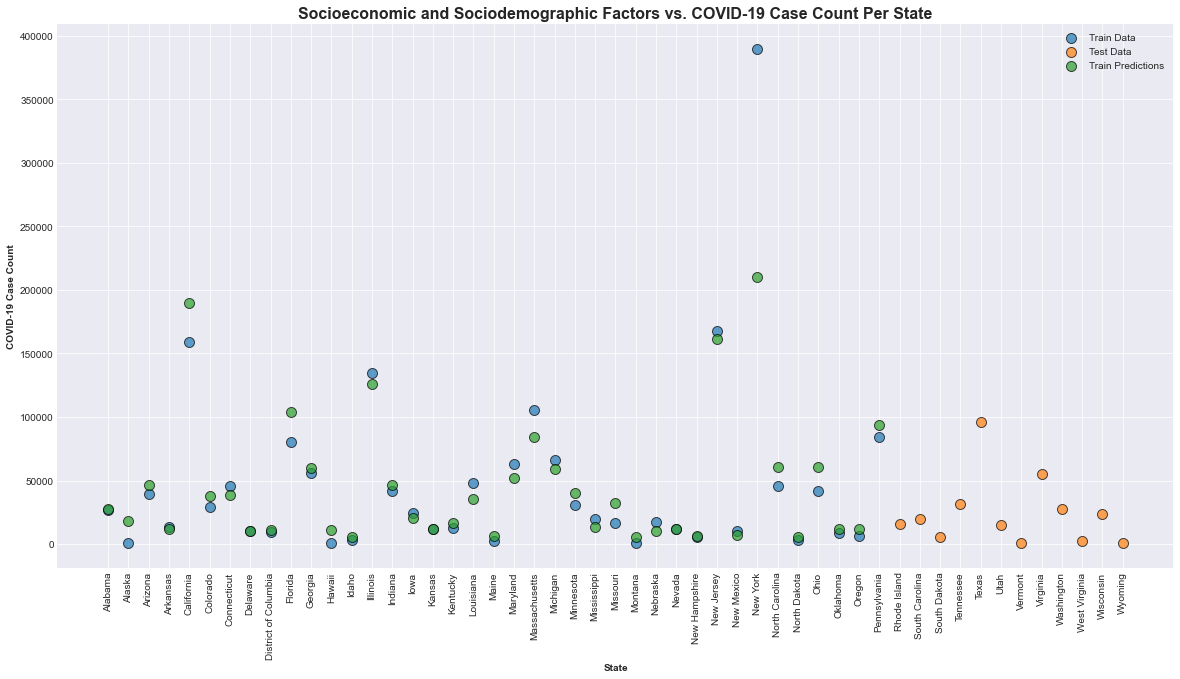

In [42]:
rcParams['figure.figsize'] = 20, 10

plt.figure()

plt.scatter(x = train['State'], y = train['cases'], linewidths = 1, alpha = 0.7, edgecolor = 'k', s = 100, cmap = 'inferno')
plt.scatter(x = test['State'], y = test['cases'], linewidths = 1, alpha = 0.7, edgecolor = 'k', s = 100, cmap = 'inferno')
plt.scatter(x = train['State'], y = train_predictions, linewidths = 1, alpha = 0.7, edgecolor = 'k', s = 100, cmap = 'inferno')
plt.title('Socioeconomic and Sociodemographic Factors vs. COVID-19 Case Count Per State', fontsize = 16, fontweight = 'bold')
plt.xlabel('State', fontsize = 10, fontweight = 'bold')
plt.ylabel('COVID-19 Case Count', fontsize = 10, fontweight = 'bold')

plt.legend(['Train Data', 'Test Data', 'Train Predictions'])

plt.xticks(rotation = 90)
plt.show();

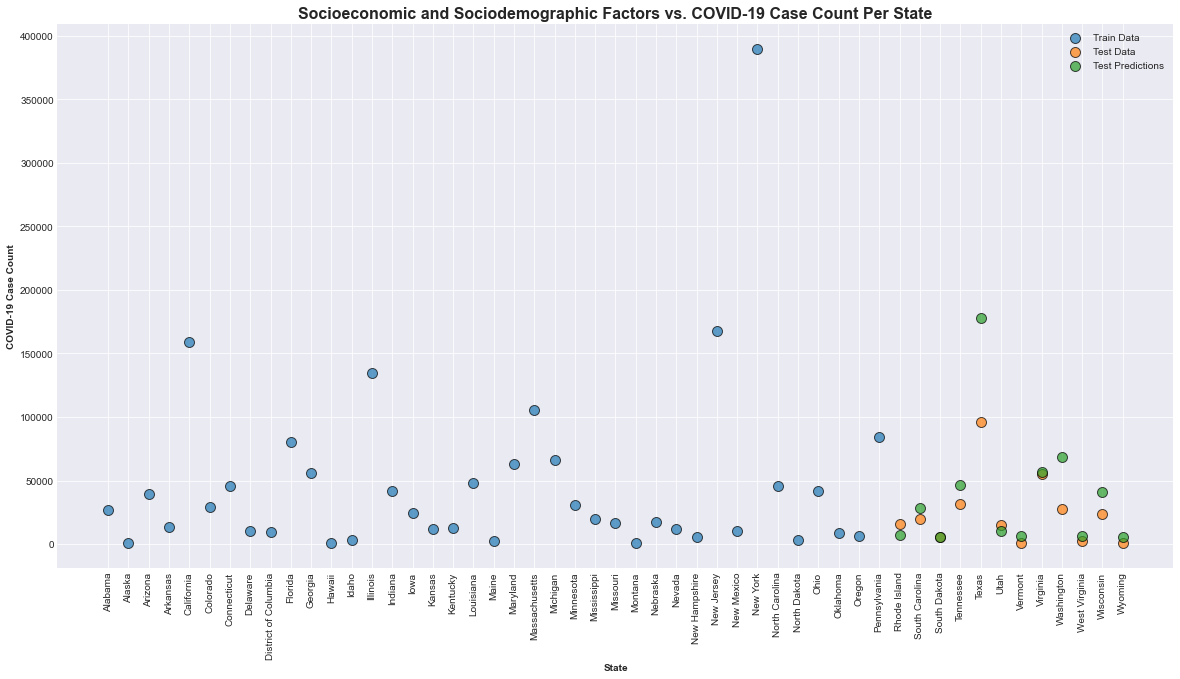

In [43]:
rcParams['figure.figsize'] = 20, 10

plt.figure()

plt.scatter(x = train['State'], y = train['cases'], linewidths = 1, alpha = 0.7, edgecolor = 'k', s = 100, cmap = 'inferno')
plt.scatter(x = test['State'], y = test['cases'], linewidths = 1, alpha = 0.7, edgecolor = 'k', s = 100, cmap = 'inferno')
plt.scatter(x = test['State'], y = test_predictions, linewidths = 1, alpha = 0.7, edgecolor = 'k', s = 100, cmap = 'inferno')
plt.title('Socioeconomic and Sociodemographic Factors vs. COVID-19 Case Count Per State', fontsize = 16, fontweight = 'bold')
plt.xlabel('State', fontsize = 10, fontweight = 'bold')
plt.ylabel('COVID-19 Case Count', fontsize = 10, fontweight = 'bold')

plt.legend(['Train Data', 'Test Data', 'Test Predictions'])

plt.xticks(rotation = 90)
plt.show();

In [44]:
base_accuracy = evaluate(RanForModel, X_train_scaled, y_train_scaled)

Model Performance
Average Error: 0.8047 degrees.
Accuracy = 93.47%.


In [45]:
new_accuracy = evaluate(RF_NewModel, X_train_scaled, y_train_scaled)

Model Performance
Average Error: 0.7714 degrees.
Accuracy = 93.73%.


In [46]:
print('Improvement of {:0.2f}%.'.format( 100 * (new_accuracy - base_accuracy) / new_accuracy))

Improvement of 0.27%.


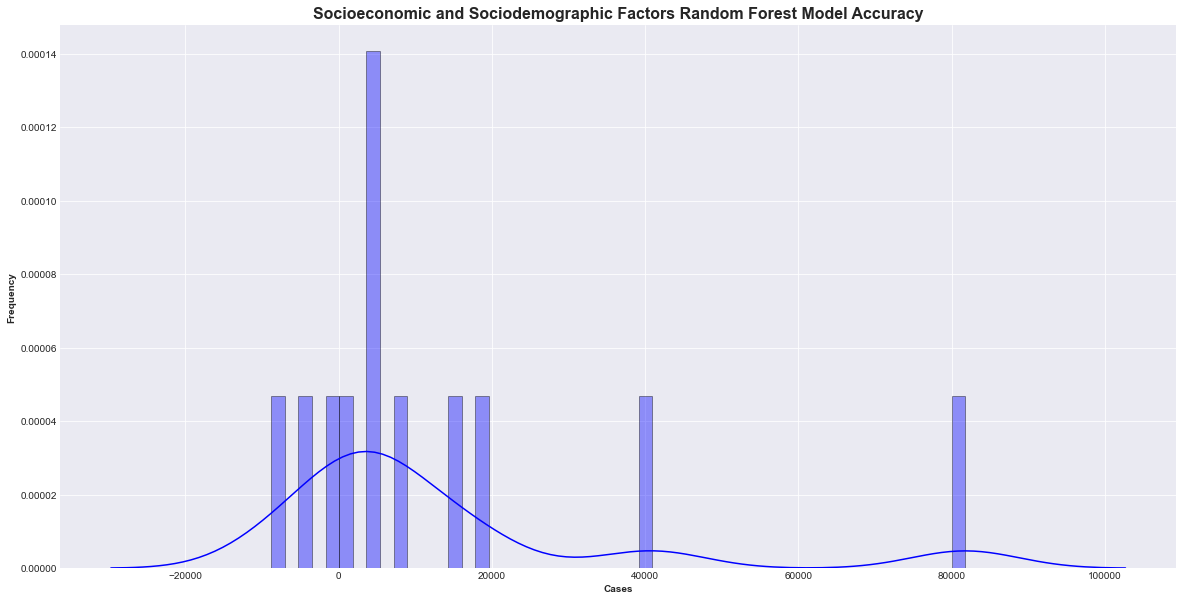

In [47]:
rcParams['figure.figsize'] = 20, 10

plt.figure()
sns.distplot((np.array(test_predictions).reshape(-1) - y_test), bins = 51, color = 'b', hist_kws = {'edgecolor':'k'})
plt.title('Socioeconomic and Sociodemographic Factors Random Forest Model Accuracy', fontsize = 16, fontweight = 'bold')
plt.xlabel('Cases', fontsize = 10, fontweight = 'bold')
plt.ylabel('Frequency', fontsize = 10, fontweight = 'bold')

plt.show();

## XGBoost

In [48]:
features_list = columns
    
target = 'cases'

X_train = train[features_list]
y_train = train[target]
X_test = test[features_list]
y_test = test[target]

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
y_train_scaled = scaler.fit_transform(np.array(y_train).reshape(-1, 1))

XGBmodel = XGBRegressor()
XGBmodel.fit(X_train_scaled, y_train_scaled)

train_predictions_scaled = XGBmodel.predict(X_train_scaled)
train_predictions = scaler.inverse_transform(train_predictions_scaled)
test_predictions_scaled = XGBmodel.predict(X_test_scaled)
test_predictions = scaler.inverse_transform(test_predictions_scaled)

Train_MAE = mean_absolute_error(y_train, train_predictions)
Train_MSE = mean_squared_error(y_train, train_predictions)
Train_RMS = sqrt(mean_squared_error(y_train, train_predictions))
Train_R2Score = r2_score(y_train, train_predictions)

Test_MAE = mean_absolute_error(y_test, test_predictions)
Test_MSE = mean_squared_error(y_test, test_predictions)
Test_RMS = sqrt(mean_squared_error(y_test, test_predictions))
Test_R2Score = r2_score(y_test, test_predictions)

print('Train MAE Value:', Train_MAE)
print('Train MSE Value:', Train_MSE)
print('Train RMS Value:', Train_RMS)
print('Train R2 Score:', Train_R2Score)
print('\n')

print('Test MAE Value:', Test_MAE)
print('Test MSE Value:', Test_MSE)
print('Test RMS Value:', Test_RMS)
print('Test R2 Score:', Test_R2Score)

Train MAE Value: 20.41168212890625
Train MSE Value: 920.8921344825663
Train RMS Value: 30.346204614128705
Train R2 Score: 0.9999998097259829


Test MAE Value: 25207.834350585938
Test MSE Value: 3348305429.016437
Test RMS Value: 57864.54379856837
Test R2 Score: -3.8821196248347682


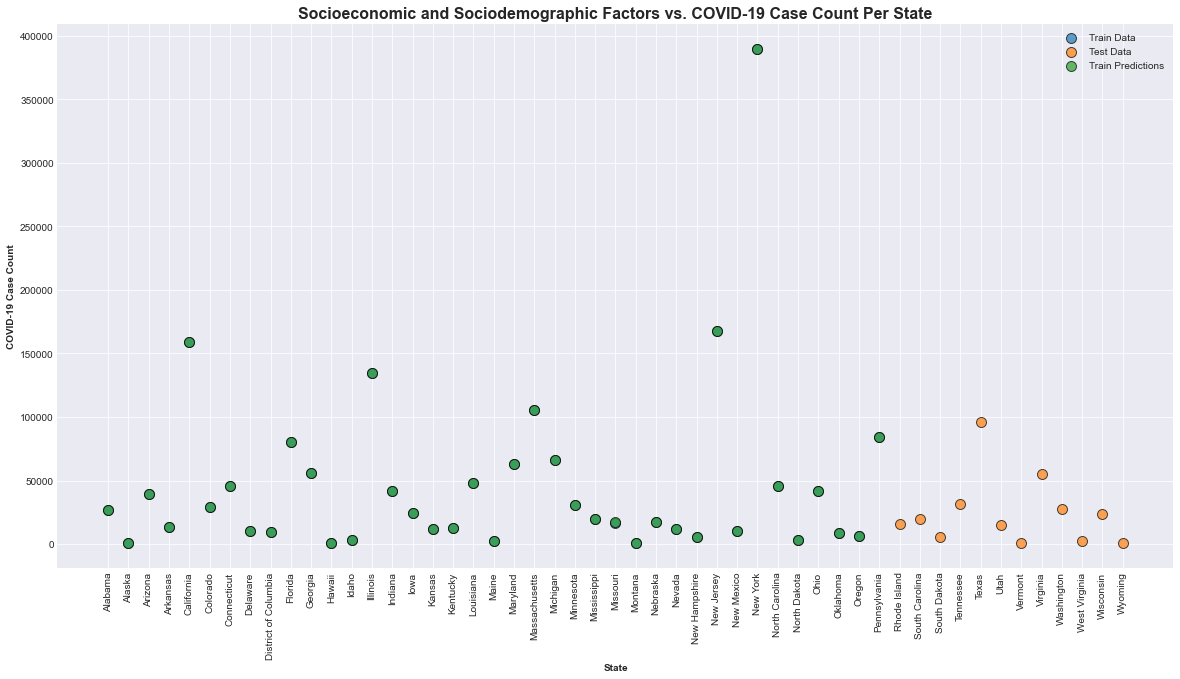

In [49]:
rcParams['figure.figsize'] = 20, 10

plt.figure()

plt.scatter(x = train['State'], y = train['cases'], linewidths = 1, alpha = 0.7, edgecolor = 'k', s = 100, cmap = 'inferno')
plt.scatter(x = test['State'], y = test['cases'], linewidths = 1, alpha = 0.7, edgecolor = 'k', s = 100, cmap = 'inferno')
plt.scatter(x = train['State'], y = train_predictions, linewidths = 1, alpha = 0.7, edgecolor = 'k', s = 100, cmap = 'inferno')
plt.title('Socioeconomic and Sociodemographic Factors vs. COVID-19 Case Count Per State', fontsize = 16, fontweight = 'bold')
plt.xlabel('State', fontsize = 10, fontweight = 'bold')
plt.ylabel('COVID-19 Case Count', fontsize = 10, fontweight = 'bold')

plt.legend(['Train Data', 'Test Data', 'Train Predictions'])

plt.xticks(rotation = 90)
plt.show();

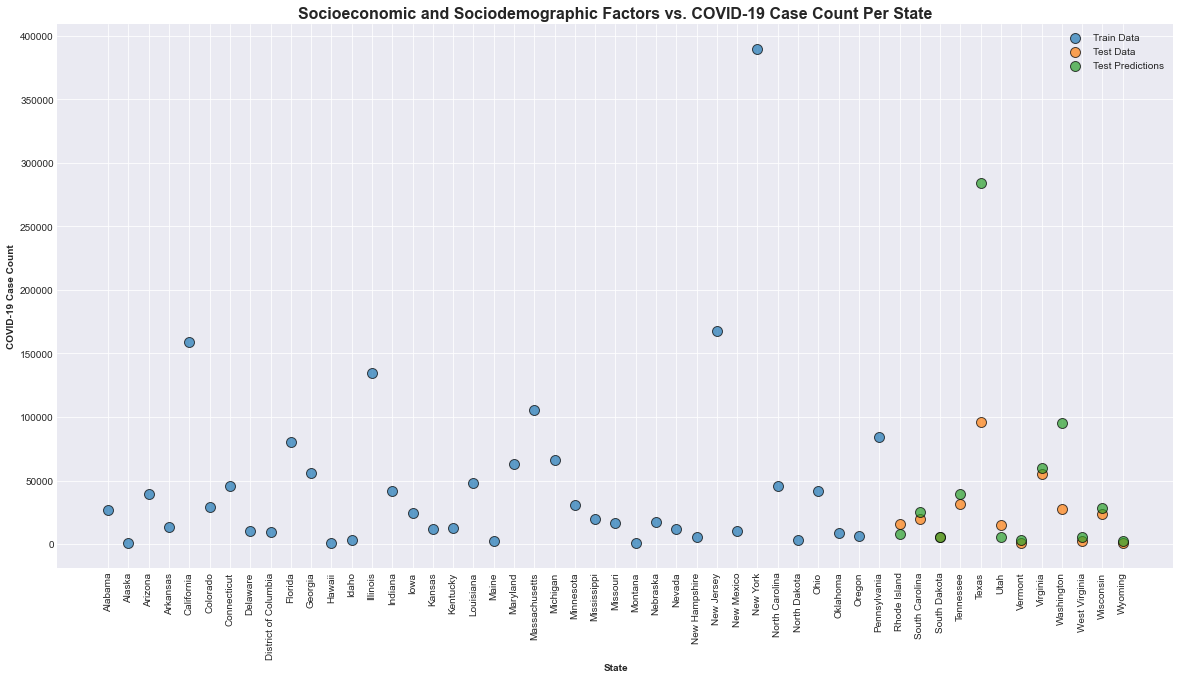

In [50]:
rcParams['figure.figsize'] = 20, 10

plt.figure()

plt.scatter(x = train['State'], y = train['cases'], linewidths = 1, alpha = 0.7, edgecolor = 'k', s = 100, cmap = 'inferno')
plt.scatter(x = test['State'], y = test['cases'], linewidths = 1, alpha = 0.7, edgecolor = 'k', s = 100, cmap = 'inferno')
plt.scatter(x = test['State'], y = test_predictions, linewidths = 1, alpha = 0.7, edgecolor = 'k', s = 100, cmap = 'inferno')
plt.title('Socioeconomic and Sociodemographic Factors vs. COVID-19 Case Count Per State', fontsize = 16, fontweight = 'bold')
plt.xlabel('State', fontsize = 10, fontweight = 'bold')
plt.ylabel('COVID-19 Case Count', fontsize = 10, fontweight = 'bold')

plt.legend(['Train Data', 'Test Data', 'Test Predictions'])

plt.xticks(rotation = 90)
plt.show();

In [51]:
evaluate(XGBmodel, X_train_scaled, y_train_scaled)

Model Performance
Average Error: 0.8310 degrees.
Accuracy = 91.26%.


91.25735856773954

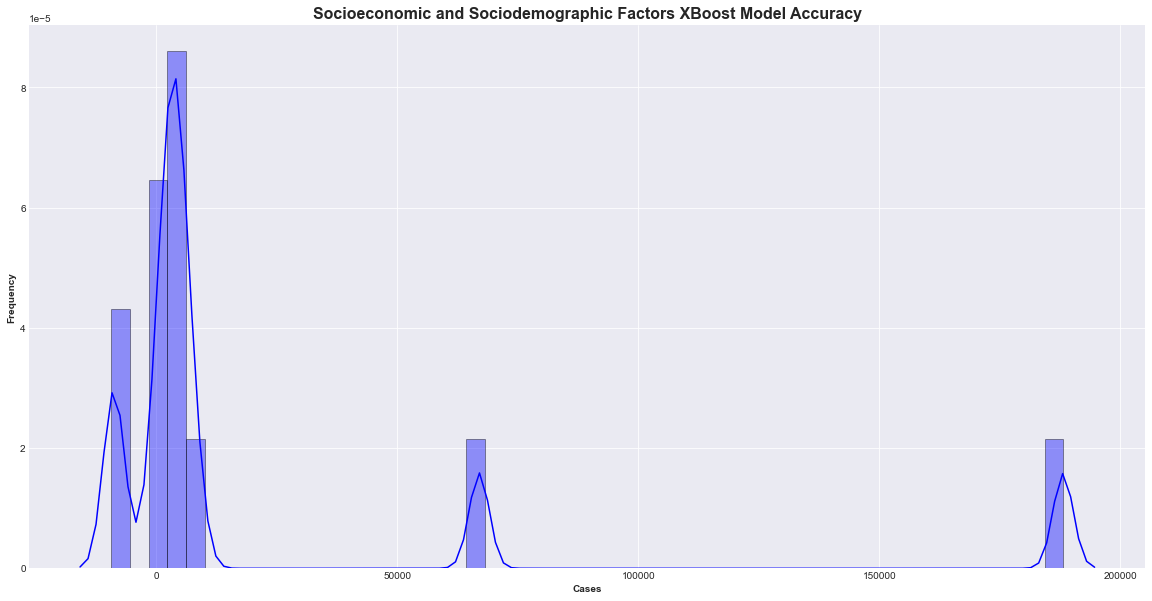

In [52]:
rcParams['figure.figsize'] = 20, 10

plt.figure()
sns.distplot((np.array(test_predictions).reshape(-1) - y_test), bins = 51, color = 'b', hist_kws = {'edgecolor':'k'})
plt.title('Socioeconomic and Sociodemographic Factors XBoost Model Accuracy', fontsize = 16, fontweight = 'bold')
plt.xlabel('Cases', fontsize = 10, fontweight = 'bold')
plt.ylabel('Frequency', fontsize = 10, fontweight = 'bold')

plt.show();

### Tuning

In [53]:
param_grid = {
    "learning_rate": [0.05, 0.06, 0.07, 0.08, 0.09, 0.1],
    "max_depth": [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
    "reg_lambda": [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
    "colsample_bytree":[0.7, 0.8, 0.9, 1.0],
    "min_child_weight": [1, 2, 3]
}

kfold = KFold(n_splits = 7)

XG_GridModel = GridSearchCV(estimator = XGBmodel, param_grid = param_grid, 
                          cv = kfold, n_jobs = -1, verbose = 2, return_train_score=True)

XG_NewModel = XG_GridModel.fit(X_train_scaled, y_train_scaled);

Fitting 7 folds for each of 7200 candidates, totalling 50400 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:    0.8s
[Parallel(n_jobs=-1)]: Done 288 tasks      | elapsed:    2.6s
[Parallel(n_jobs=-1)]: Done 1100 tasks      | elapsed:   11.5s
[Parallel(n_jobs=-1)]: Done 2232 tasks      | elapsed:   25.6s
[Parallel(n_jobs=-1)]: Done 3692 tasks      | elapsed:   43.0s
[Parallel(n_jobs=-1)]: Done 5472 tasks      | elapsed:  1.1min
[Parallel(n_jobs=-1)]: Done 7580 tasks      | elapsed:  1.5min
[Parallel(n_jobs=-1)]: Done 10008 tasks      | elapsed:  2.0min
[Parallel(n_jobs=-1)]: Done 12764 tasks      | elapsed:  2.6min
[Parallel(n_jobs=-1)]: Done 15840 tasks      | elapsed:  3.2min
[Parallel(n_jobs=-1)]: Done 19244 tasks      | elapsed:  3.9min
[Parallel(n_jobs=-1)]: Done 22968 tasks      | elapsed:  4.8min
[Parallel(n_jobs=-1)]: Done 27020 tasks      | elapsed:  5.8min
[Parallel(n_jobs=-1)]: Done 31392 tasks      | elapsed:  6.8min
[Parallel(n_jobs=-1)]: Done 36092 ta

In [54]:
XG_NewModel.best_params_

{'colsample_bytree': 0.8,
 'learning_rate': 0.06,
 'max_depth': 4,
 'min_child_weight': 2,
 'reg_lambda': 9}

In [55]:
train_predictions_scaled = XG_NewModel.predict(X_train_scaled)
train_predictions = scaler.inverse_transform(train_predictions_scaled)
test_predictions_scaled = XG_NewModel.predict(X_test_scaled)
test_predictions = scaler.inverse_transform(test_predictions_scaled)

Train_MAE = mean_absolute_error(y_train, train_predictions)
Train_MSE = mean_squared_error(y_train, train_predictions)
Train_RMS = sqrt(mean_squared_error(y_train, train_predictions))
Train_R2Score = r2_score(y_train, train_predictions)

Test_MAE = mean_absolute_error(y_test, test_predictions)
Test_MSE = mean_squared_error(y_test, test_predictions)
Test_RMS = sqrt(mean_squared_error(y_test, test_predictions))
Test_R2Score = r2_score(y_test, test_predictions)

print('Train MAE Value:', Train_MAE)
print('Train MSE Value:', Train_MSE)
print('Train RMS Value:', Train_RMS)
print('Train R2 Score:', Train_R2Score)
print('\n')

print('Test MAE Value:', Test_MAE)
print('Test MSE Value:', Test_MSE)
print('Test RMS Value:', Test_RMS)
print('Test R2 Score:', Test_R2Score)

Train MAE Value: 7095.5791015625
Train MSE Value: 777404458.7899303
Train RMS Value: 27881.973724790903
Train R2 Score: 0.8393732949331927


Test MAE Value: 12832.934366861979
Test MSE Value: 477917070.87193394
Test RMS Value: 21861.314481794867
Test R2 Score: 0.3031554736531883


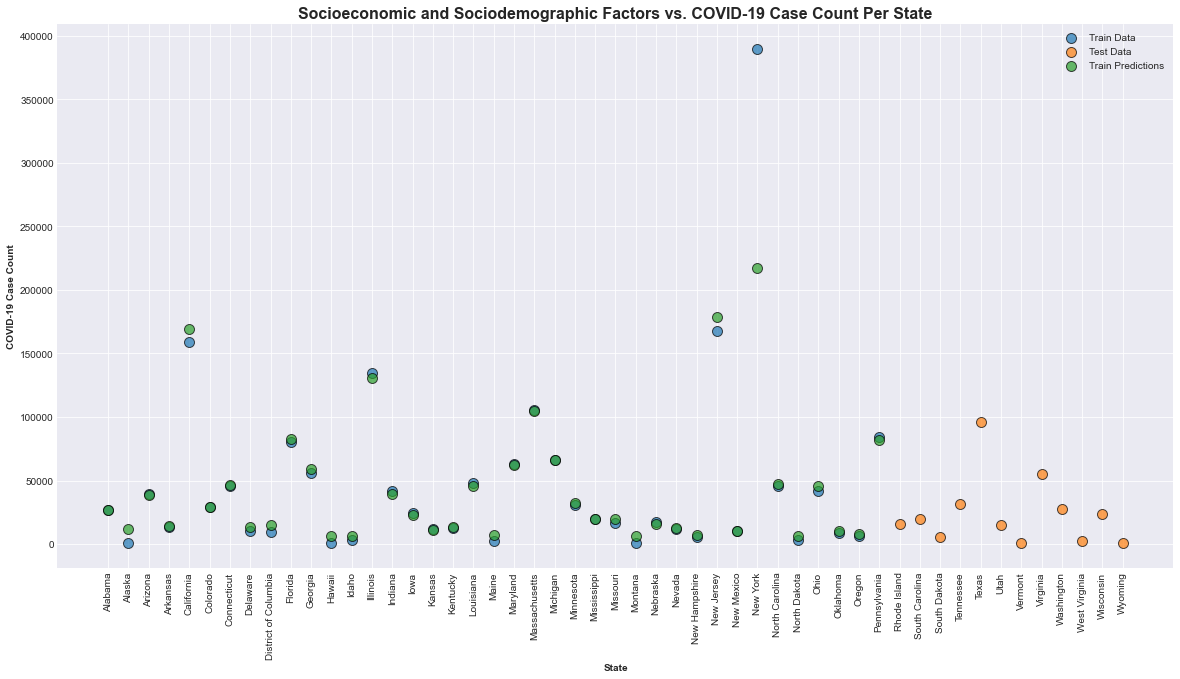

In [56]:
rcParams['figure.figsize'] = 20, 10

plt.figure()

plt.scatter(x = train['State'], y = train['cases'], linewidths = 1, alpha = 0.7, edgecolor = 'k', s = 100, cmap = 'inferno')
plt.scatter(x = test['State'], y = test['cases'], linewidths = 1, alpha = 0.7, edgecolor = 'k', s = 100, cmap = 'inferno')
plt.scatter(x = train['State'], y = train_predictions, linewidths = 1, alpha = 0.7, edgecolor = 'k', s = 100, cmap = 'inferno')
plt.title('Socioeconomic and Sociodemographic Factors vs. COVID-19 Case Count Per State', fontsize = 16, fontweight = 'bold')
plt.xlabel('State', fontsize = 10, fontweight = 'bold')
plt.ylabel('COVID-19 Case Count', fontsize = 10, fontweight = 'bold')

plt.legend(['Train Data', 'Test Data', 'Train Predictions'])

plt.xticks(rotation = 90)
plt.show();

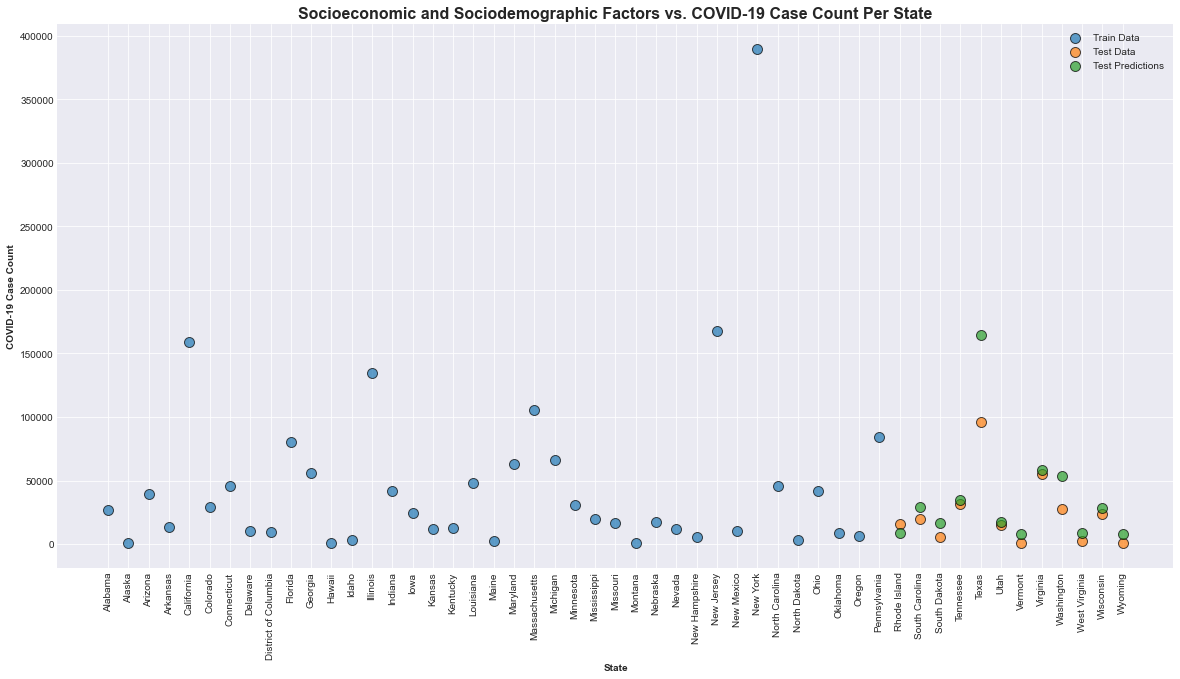

In [57]:
rcParams['figure.figsize'] = 20, 10

plt.figure()

plt.scatter(x = train['State'], y = train['cases'], linewidths = 1, alpha = 0.7, edgecolor = 'k', s = 100, cmap = 'inferno')
plt.scatter(x = test['State'], y = test['cases'], linewidths = 1, alpha = 0.7, edgecolor = 'k', s = 100, cmap = 'inferno')
plt.scatter(x = test['State'], y = test_predictions, linewidths = 1, alpha = 0.7, edgecolor = 'k', s = 100, cmap = 'inferno')
plt.title('Socioeconomic and Sociodemographic Factors vs. COVID-19 Case Count Per State', fontsize = 16, fontweight = 'bold')
plt.xlabel('State', fontsize = 10, fontweight = 'bold')
plt.ylabel('COVID-19 Case Count', fontsize = 10, fontweight = 'bold')

plt.legend(['Train Data', 'Test Data', 'Test Predictions'])

plt.xticks(rotation = 90)
plt.show();

In [58]:
base_accuracy = evaluate(XGBmodel, X_train_scaled, y_train_scaled)

Model Performance
Average Error: 0.8310 degrees.
Accuracy = 91.26%.


In [59]:
new_accuracy = evaluate(XG_NewModel, X_train_scaled, y_train_scaled)

Model Performance
Average Error: 0.7668 degrees.
Accuracy = 90.85%.


In [60]:
print('Improvement of {:0.2f}%.'.format( 100 * (new_accuracy - base_accuracy) / new_accuracy))

Improvement of -0.45%.


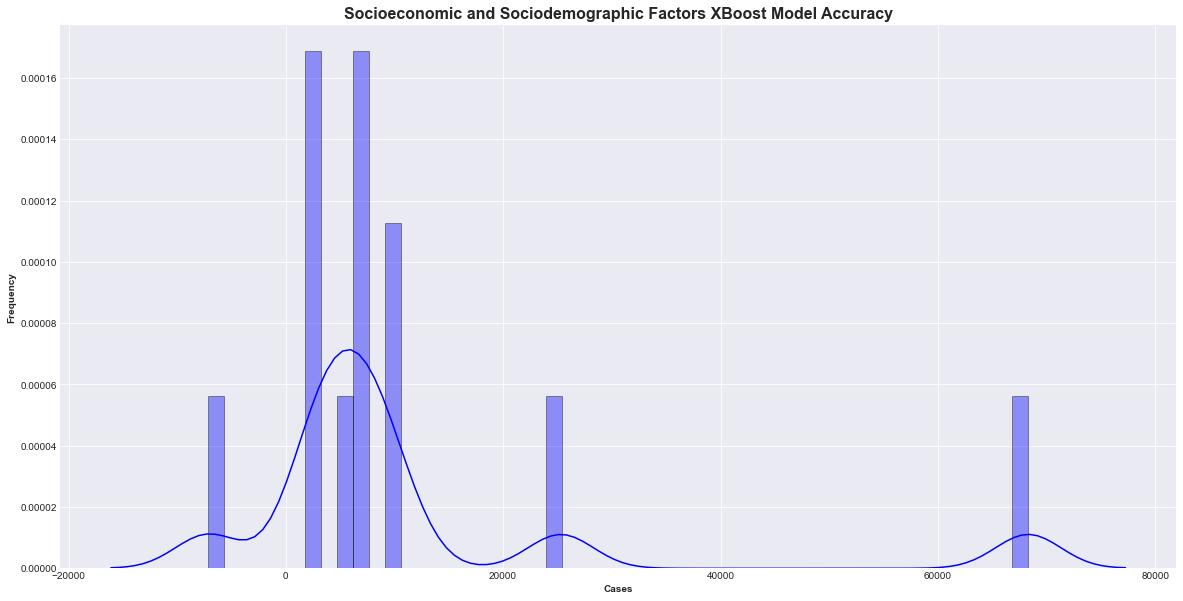

In [61]:
rcParams['figure.figsize'] = 20, 10

plt.figure()
sns.distplot((np.array(test_predictions).reshape(-1) - y_test), bins = 51, color = 'b', hist_kws = {'edgecolor':'k'})
plt.title('Socioeconomic and Sociodemographic Factors XBoost Model Accuracy', fontsize = 16, fontweight = 'bold')
plt.xlabel('Cases', fontsize = 10, fontweight = 'bold')
plt.ylabel('Frequency', fontsize = 10, fontweight = 'bold')

plt.show();

## Logistic Regression

In [62]:
COVID_DFLogReg = COVID_DF

CasesMean = COVID_DFLogReg['cases'].mean()

COVID_DFLogReg['Cases_Avg'] = COVID_DFLogReg['cases'].apply(lambda x: classify(x, CasesMean))

COVID_DFLogReg.head(25)

,State,AGI Total,AGI Top 1 Percent,AGI Top 5 Percent,AGI Top 10 Percent,AGI Top 25 Percent,AGI Top 50 Percent,AGI Top 75 Percent,Total Population,Total population_Male,...,Employer Sponsored Insurance Premium Costs (Family Coverage),Employee Contribution to Premium Costs (Single Coverage),Employee Contribution to Premium Costs (Family Coverage),Employee Contribution to Premium Costs (Combined Average),Employee Deductible Costs (Single Coverage),Employee Deductible Costs (Combined Average),Total Potential Out-of-Pocket Costs (Employee Contribution + Deductible),cases,deaths,Cases_Avg
0,Alabama,119662909,18553159,35924229,49537638,76667112,101687773,114405941,4887871,2369271,...,18001,1453,5278,4260,1569,2563,6824,26912,785,0
1,Alaska,23969001,2848087,6184956,8915998,14554105,20064361,22927860,737438,382952,...,21648,1154,4501,3695,1797,2881,6576,751,10,0
2,Arizona,197753744,33609317,63073164,85351788,128616004,168531690,189378565,7171646,3565129,...,18875,1554,5786,4834,2166,3530,8364,39298,1228,0
3,Arkansas,74634888,16319991,26475276,34256878,49689104,64088761,71584342,3013825,1476680,...,17995,1375,5728,4661,1501,2741,7403,13191,188,0
4,California,1549284943,356240355,600859502,772738760,1086299917,1360947743,1497300869,39557045,19673553,...,19567,1202,5376,4127,1680,2767,6894,159098,5202,1
5,Colorado,212581123,37479649,69617571,93359185,138935934,181679584,204043171,5695564,2864761,...,18314,1289,4963,4007,2005,3489,7495,29427,1617,0
6,Connecticut,175792834,47379889,74456114,92142733,125039874,155284852,170426876,3572665,1740533,...,20735,1672,5352,4407,2322,3409,7816,45349,4210,1
7,Delaware,31403165,4412370,8899481,12464894,19652753,26529258,30056514,967171,467924,...,20098,1340,5715,4564,1710,2871,7435,10403,424,0
8,District of Columbia,34743188,7442186,13245281,17240750,24153683,30301657,33570901,702455,334208,...,21810,1369,6358,3960,1308,1855,5815,9818,520,0
9,Florida,750608252,213461301,325886670,401558825,540976844,663846145,726074247,21299325,10404676,...,18934,1472,5908,4712,1963,3213,7925,80101,2992,1


In [63]:
model2 = sm.OLS(COVID_DFLogReg['Cases_Avg'], COVID_DFLogReg[columns], missing = 'drop').fit()
model2.summary()

c:\python38\lib\site-packages\statsmodels\regression\linear_model.py:1698: RuntimeWarning: divide by zero encountered in true_divide
  return 1 - (np.divide(self.nobs - self.k_constant, self.df_resid)
c:\python38\lib\site-packages\statsmodels\regression\linear_model.py:1698: RuntimeWarning: invalid value encountered in double_scalars
  return 1 - (np.divide(self.nobs - self.k_constant, self.df_resid)
c:\python38\lib\site-packages\scipy\stats\_distn_infrastructure.py:903: RuntimeWarning: invalid value encountered in greater
  return (a < x) & (x < b)
c:\python38\lib\site-packages\scipy\stats\_distn_infrastructure.py:903: RuntimeWarning: invalid value encountered in less
  return (a < x) & (x < b)
c:\python38\lib\site-packages\scipy\stats\_distn_infrastructure.py:1912: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= _a)
c:\python38\lib\site-packages\statsmodels\regression\linear_model.py:1620: RuntimeWarning: divide by zero encountered in double_scalars
  

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              Cases_Avg   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                    nan
Method:                 Least Squares   F-statistic:                       nan
Date:                Wed, 08 Jul 2020   Prob (F-statistic):                nan
Time:                        03:23:47   Log-Likelihood:                 1298.2
No. Observations:                  51   AIC:                            -2494.
Df Residuals:                       0   BIC:                            -2396.
Df Model:                          50                                         
Covariance Type:            nonrobust                                         
============================================================================================================================================
                                                                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------------------------------------------
AGI Total                                                                -5.306e-07        inf         -0        nan         nan         nan
AGI Top 1 Percent                                                         1.811e-07        inf          0        nan         nan         nan
AGI Top 5 Percent                                                        -8.832e-07        inf         -0        nan         nan         nan
AGI Top 10 Percent                                                        8.014e-07        inf          0        nan         nan         nan
AGI Top 25 Percent                                                        1.933e-07        inf          0        nan         nan         nan
AGI Top 50 Percent                                                       -6.055e-07        inf         -0        nan         nan         nan
AGI Top 75 Percent                                                        8.523e-07        inf          0        nan         nan         nan
Total Population                                                          6.143e-07        inf          0        nan         nan         nan
Total population_Male                                                     7.426e-06        inf          0        nan         nan         nan
Total population_Female                                                  -6.812e-06        inf         -0        nan         nan         nan
Under 5 years                                                             3.196e-05        inf          0        nan         nan         nan
5 to 9 years                                                             -2.231e-05        inf         -0        nan         nan         nan
10 to 14 years                                                           -7.879e-07        inf         -0        nan         nan         nan
15 to 19 years                                                            6.328e-06        inf          0        nan         nan         nan
20 to 24 years                                                           -8.165e-07        inf         -0        nan         nan         nan
25 to 34 years                                                           -8.209e-06        inf         -0        nan         nan         nan
35 to 44 years                                                           -1.515e-06        inf         -0        nan         nan         nan
45 to 54 years                                                             4.42e-06        inf          0        nan         nan         nan
55 to 59 years                                                           -7.185e-06        inf         -0        nan      

In [64]:
test_len = int(0.25 * len(COVID_DFLogReg))
train_len = len(COVID_DFLogReg) - test_len
print('Train Set Len: ' + str(train_len))
print('Test Set Len: ' + str(test_len))

train = COVID_DFLogReg[:train_len]
test = COVID_DFLogReg[train_len:]
print('Train Set Shape: ' + str(train.shape))
print('Test Set Shape: ' + str(test.shape))

Train Set Len: 39
Test Set Len: 12
Train Set Shape: (39, 103)
Test Set Shape: (12, 103)


In [65]:
features_list = columns
    
target = 'Cases_Avg'

X_train = train[features_list]
y_train = train[target]
X_test = test[features_list]
y_test = test[target]

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

LogRegModel = LogisticRegression()
LogRegModel.fit(X_train_scaled, y_train)

train_predictions = LogRegModel.predict(X_train_scaled)
test_predictions = LogRegModel.predict(X_test_scaled)

Train_MAE = mean_absolute_error(y_train, train_predictions)
Train_MSE = mean_squared_error(y_train, train_predictions)
Train_RMS = sqrt(mean_squared_error(y_train, train_predictions))
Train_R2Score = r2_score(y_train, train_predictions)

Test_MAE = mean_absolute_error(y_test, test_predictions)
Test_MSE = mean_squared_error(y_test, test_predictions)
Test_RMS = sqrt(mean_squared_error(y_test, test_predictions))
Test_R2Score = r2_score(y_test, test_predictions)

print('Train MAE Value:', Train_MAE)
print('Train MSE Value:', Train_MSE)
print('Train RMS Value:', Train_RMS)
print('Train R2 Score:', Train_R2Score)
print('\n')

print('Test MAE Value:', Test_MAE)
print('Test MSE Value:', Test_MSE)
print('Test RMS Value:', Test_RMS)
print('Test R2 Score:', Test_R2Score)

Train MAE Value: 0.0
Train MSE Value: 0.0
Train RMS Value: 0.0
Train R2 Score: 1.0


Test MAE Value: 0.0
Test MSE Value: 0.0
Test RMS Value: 0.0
Test R2 Score: 1.0


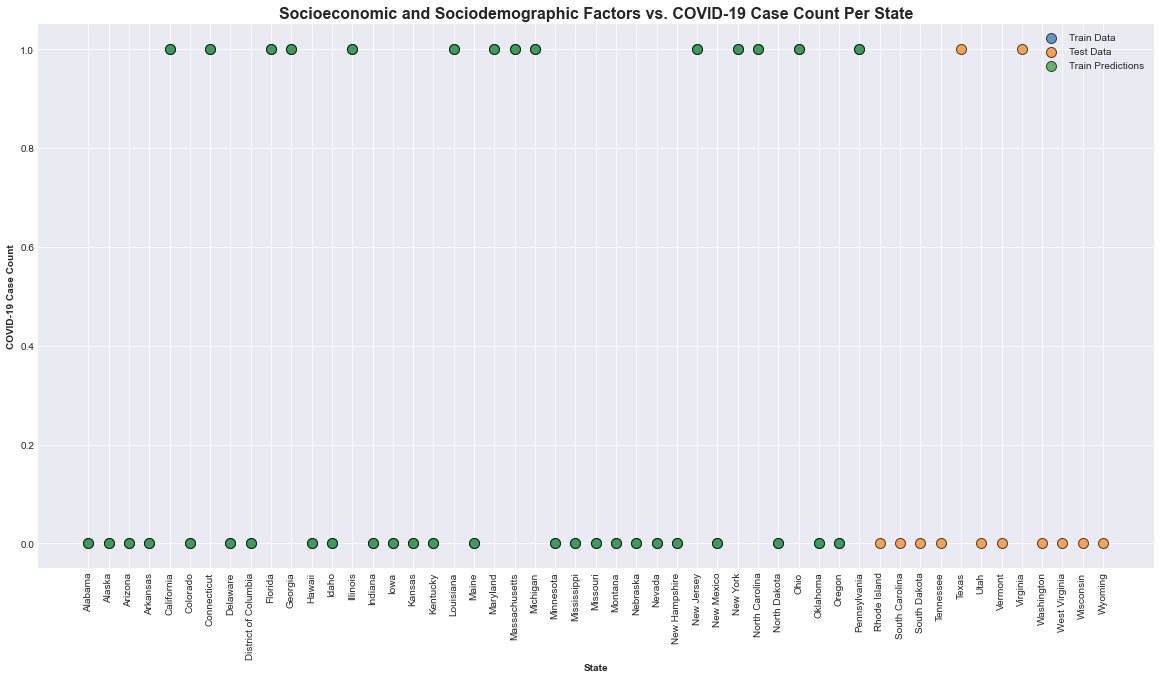

In [66]:
rcParams['figure.figsize'] = 20, 10

plt.figure()

plt.scatter(x = train['State'], y = train['Cases_Avg'], linewidths = 1, alpha = 0.7, edgecolor = 'k', s = 100, cmap = 'inferno')
plt.scatter(x = test['State'], y = test['Cases_Avg'], linewidths = 1, alpha = 0.7, edgecolor = 'k', s = 100, cmap = 'inferno')
plt.scatter(x = train['State'], y = train_predictions, linewidths = 1, alpha = 0.7, edgecolor = 'k', s = 100, cmap = 'inferno')
plt.title('Socioeconomic and Sociodemographic Factors vs. COVID-19 Case Count Per State', fontsize = 16, fontweight = 'bold')
plt.xlabel('State', fontsize = 10, fontweight = 'bold')
plt.ylabel('COVID-19 Case Count', fontsize = 10, fontweight = 'bold')

plt.legend(['Train Data', 'Test Data', 'Train Predictions'])

plt.xticks(rotation = 90)
plt.show();

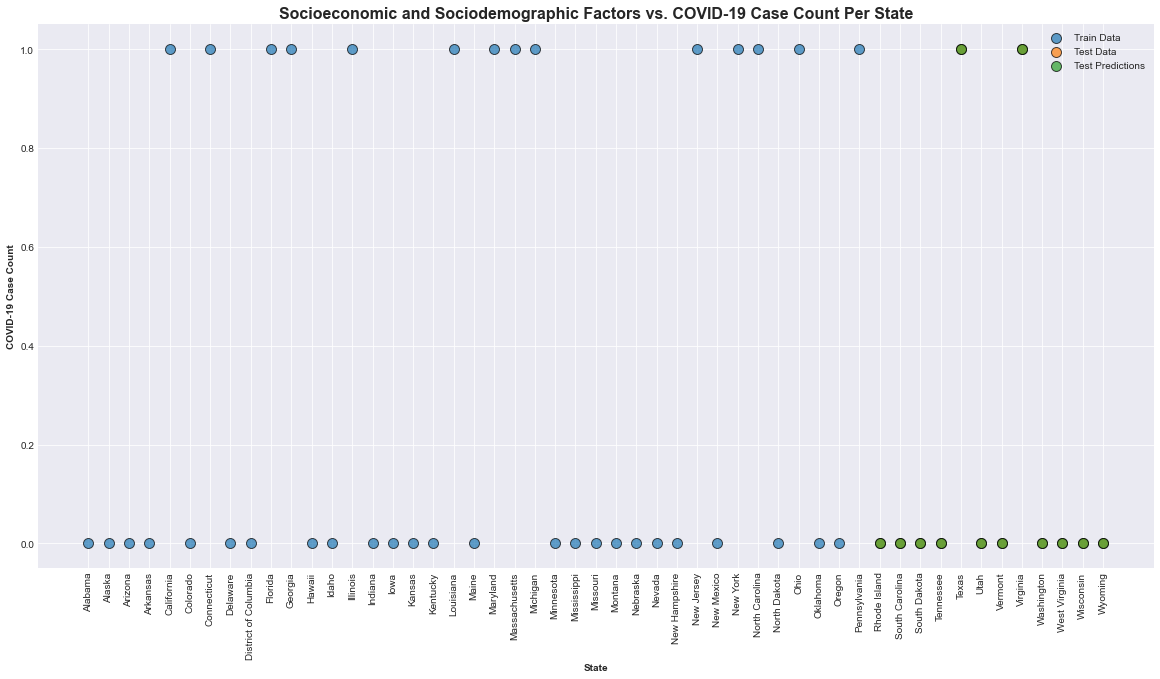

In [67]:
rcParams['figure.figsize'] = 20, 10

plt.figure()

plt.scatter(x = train['State'], y = train['Cases_Avg'], linewidths = 1, alpha = 0.7, edgecolor = 'k', s = 100, cmap = 'inferno')
plt.scatter(x = test['State'], y = test['Cases_Avg'], linewidths = 1, alpha = 0.7, edgecolor = 'k', s = 100, cmap = 'inferno')
plt.scatter(x = test['State'], y = test_predictions, linewidths = 1, alpha = 0.7, edgecolor = 'k', s = 100, cmap = 'inferno')
plt.title('Socioeconomic and Sociodemographic Factors vs. COVID-19 Case Count Per State', fontsize = 16, fontweight = 'bold')
plt.xlabel('State', fontsize = 10, fontweight = 'bold')
plt.ylabel('COVID-19 Case Count', fontsize = 10, fontweight = 'bold')

plt.legend(['Train Data', 'Test Data', 'Test Predictions'])

plt.xticks(rotation = 90)
plt.show();